In [20]:
#using soup environment, python version 3.7.0
import numpy as np
import matplotlib.pyplot as plt

from utils.myutils import *
from pathlib import Path
from resize.scipy import resize
import nibabel as nib
from tqdm import tqdm
import pandas as pd

import copy

In [21]:
hr = np.load('pwr/hr.npy')
lr = np.load('pwr/lr.npy')
sm = np.load('pwr/sm.npy')
soup = np.load('pwr/soup.npy')
synth = np.load('pwr/synth.npy')

In [22]:
hr_c,hr_r = map(list,zip(*hr))
lr_c,lr_r = map(list,zip(*lr))
sm_c,sm_r = map(list,zip(*sm))
soup_c,soup_r = map(list,zip(*soup))
synth_c,synth_r = map(list,zip(*synth))

In [23]:
#find the average
hrc = sum(hr_c)/len(hr_c)
hrr = sum(hr_r)/len(hr_r)
lrc = sum(lr_c)/len(lr_c)
lrr = sum(lr_r)/len(lr_r)
smc = sum(sm_c)/len(sm_c)
smr = sum(sm_r)/len(sm_r)
soupc = sum(soup_c)/len(soup_c)
soupr = sum(soup_r)/len(soup_r)
synthc = sum(synth_c)/len(synth_c)
synthr = sum(synth_r)/len(synth_r)

In [5]:
new_df = pd.DataFrame(index = range(0,10),columns=['Data','Type','Method','SD'])

In [24]:
new_df.iloc[8] = [hrc,'center','Ground Truth',np.std(hr_c,ddof = 1)]
new_df.iloc[9] = [hrr,'rim','Ground Truth',np.std(hr_r,ddof = 1)]
new_df.iloc[0] = [lrc,'center','Interpolated',np.std(lr_c,ddof = 1)]
new_df.iloc[1] = [lrr,'rim','Interpolated',np.std(lr_r,ddof = 1)]
new_df.iloc[2] = [smc,'center','SMORE',np.std(sm_c,ddof = 1)]
new_df.iloc[3] = [smr,'rim','SMORE',np.std(sm_r,ddof = 1)]
new_df.iloc[4] = [soupc,'center','Soup_GAN',np.std(soup_c,ddof = 1)]
new_df.iloc[5] = [soupr,'rim','Soup_GAN',np.std(soup_r,ddof = 1)]
new_df.iloc[6] = [synthc,'center','SynthSR',np.std(synth_c,ddof = 1)]
new_df.iloc[7] = [synthr,'rim','SynthSR', np.std(synth_r,ddof = 1)]

In [25]:
import seaborn as sns

/home/ashley/miniconda3/envs/soup/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(70815642220.95905, 13000000000000.0)

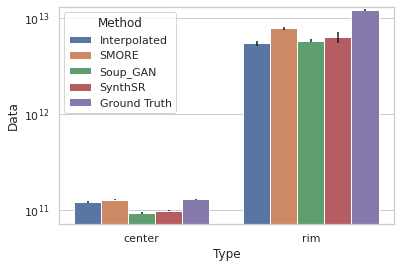

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=new_df, x="Type", y="Data", hue="Method")
x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=new_df["SD"], fmt="none", c= "k")
plt.yscale('log')
plt.ylim(0,1.3e+13)



In [27]:
plt.savefig('images/center_power.png',dpi=300)

<Figure size 432x288 with 0 Axes>

In [30]:
hr = np.load('pwr/coronalhr.npy')
lr = np.load('pwr/coronallr.npy')
sm = np.load('pwr/coronalsm.npy')
soup = np.load('pwr/coronalsoup.npy')
synth = np.load('pwr/coronalsynth.npy')

In [31]:
hr_c,hr_r = map(list,zip(*hr))
lr_c,lr_r = map(list,zip(*lr))
sm_c,sm_r = map(list,zip(*sm))
soup_c,soup_r = map(list,zip(*soup))
synth_c, synth_r = map(list,zip(*synth))

In [32]:
hrc = sum(hr_c)/len(hr_c)
hrr = sum(hr_r)/len(hr_r)
lrc = sum(lr_c)/len(lr_c)
lrr = sum(lr_r)/len(lr_r)
smc = sum(sm_c)/len(sm_c)
smr = sum(sm_r)/len(sm_r)
soupc = sum(soup_c)/len(soup_c)
soupr = sum(soup_r)/len(soup_r)
synthc = sum(synth_c)/len(synth_c)
synthr = sum(synth_r)/len(synth_r)

In [33]:
new_df = pd.DataFrame(index = range(0,10),columns=['Data','Type','Method','SD'])

In [34]:
hr_c

[99528441273.42436,
 98914833798.56235,
 98689688993.35892,
 103303601491.3079,
 101499363986.54156,
 100719995594.16222,
 100871795819.99869,
 98763034390.26843,
 105276956981.29445,
 94993045809.20135]

In [35]:
new_df.iloc[8] = [hrc,'center','Ground Truth',np.std(hr_c,ddof = 1)]
new_df.iloc[9] = [hrr,'rim','Ground Truth',np.std(hr_r,ddof = 1)]
new_df.iloc[0] = [lrc,'center','Interpolated',np.std(lr_c,ddof = 1)]
new_df.iloc[1] = [lrr,'rim','Interpolated',np.std(lr_r,ddof = 1)]
new_df.iloc[2] = [smc,'center','SMORE',np.std(sm_c,ddof = 1)]
new_df.iloc[3] = [smr,'rim','SMORE',np.std(sm_r,ddof = 1)]
new_df.iloc[4] = [soupc,'center','Soup_GAN',np.std(soup_c,ddof = 1)]
new_df.iloc[5] = [soupr,'rim','Soup_GAN',np.std(soup_r,ddof = 1)]
new_df.iloc[6] = [synthc,'center','SynthSR',np.std(synth_c,ddof = 1)]
new_df.iloc[7] = [synthr,'rim','SynthSR', np.std(synth_r,ddof = 1)]

In [36]:
import seaborn as sns

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=new_df, x="Type", y="Data", hue="Method")
x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=new_df["SD"], fmt="none", c= "k")
plt.yscale('log')
plt.ylim(0,1.3e+13)

/home/ashley/miniconda3/envs/soup/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(45858552280.622246, 13000000000000.0)

In [9]:
from matplotlib import cycler
def set_display_mode(mode='dark', figsize=(16, 9), fontsize=18):
    plt.rcParams['figure.figsize'] = figsize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['image.cmap'] = 'Greys_r'
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['image.interpolation'] = 'nearest'
    if mode == 'dark':
        bg_color = 'black'
        fg_color = 'white'
    else:
        bg_color = 'white'
        fg_color = 'black'
    plt.rcParams['figure.facecolor'] = bg_color
    plt.rcParams['axes.facecolor'] = bg_color
    plt.rcParams['axes.edgecolor'] = fg_color
    plt.rcParams['axes.prop_cycle'] = cycler(color=[fg_color]) 
    plt.rcParams['text.color'] = fg_color
    plt.rcParams['axes.labelcolor'] = fg_color
    plt.rcParams['xtick.color'] = fg_color
    plt.rcParams['ytick.color'] = fg_color

In [18]:
#x is the entire volume
#size is the number of slices in the volume
def calculate_magnitude(vol,size,sag,epsilon=1e-8):
    cent_list= []
    rim_list = []
    
    for i in range(0,size):
        if(sag == True):
            x = vol[i,:,:] #sagital
        else:
            x = vol[:,i,:]
        
        x_fft = np.fft.fftshift(np.fft.fftn(x))
        x_mag = np.zeros(x_fft.shape)

        #finding the magnitude from fft, store in x_mag
        for m,f in zip(x_mag, x_fft):# a row in x_fft
            for j in range(len(m)): # each pixel in row
                m[j] = np.abs(f[j])  

        #decibels
        lr_dim = 64
        x_db = np.zeros(x_mag.shape)
        for m, d in zip(x_mag, x_db):
            for k in range(len(d)):
                d[k] = 20*math.log10(m[k]+epsilon)

        cent = x_db[3*(lr_dim//2):5*(lr_dim//2), 3*(lr_dim//2):5*(lr_dim//2)]
        cent_pwr = (cent.sum())**2

        temp = copy.deepcopy(x_db)
        temp[lr_dim:3*lr_dim, lr_dim:3*lr_dim] = 0
        rim_pwr = (temp.sum())**2
        
        cent_list.append(cent_pwr)
        rim_list.append(rim_pwr)
    
    
    avg_cent = sum(cent_list) / len(cent_list)
    avg_rim = sum(rim_list) / len(rim_list)
    
    return (avg_cent,avg_rim)

#sm_center, sm_rim = calculate_magnitude(sm_db,64)

In [19]:
#do experiment on 10 subjects
#hr and lr images are in the same order
hr_path = Path("/iacl/pg22/sam/data/OASIS3/OASIS3_iso/")
lr_path = Path("/iacl/pg22/sam/data/OASIS3/OASIS3_LR/04-skip-00")
hr = list(hr_path.iterdir())
lr = list(lr_path.iterdir())
hr_list = hr[0:10]
lr_list = lr[0:10]



In [20]:
#create hr_image list
hr_images = []
for hr in hr_list:
    im = nib.load(hr)
    hr_img = im.get_fdata(dtype=np.float32)
    hr_images.append(hr_img)

ratio = 256/64
lr_images = []
for lr in lr_list:
    im = nib.load(lr)
    lr_img = im.get_fdata(dtype=np.float32)
    
    #lr resample
    lr_upsampled = resize(lr_img,dxyz=(1,1,1/ratio), order=3)
    lr_images.append(lr_upsampled)
    

In [21]:
#smore list
sm_path = Path("/iacl/pg22/ashley/order_output/")
sm_list = list(sm_path.iterdir()) #order is not right
sm_images=[]

#rearrange sm_list manually
order = [2,1,7,5,4,8,3,6,0,9]

sm_ordered_list = []
for num in order:
    sm_ordered_list.append(sm_list[num])

    
for sm in sm_ordered_list:
    im = nib.load(sm)
    sm_img = im.get_fdata(dtype=np.float32)
    sm_images.append(sm_img)

#kevin list
soup_path = Path("kevin_out")
soup_list = list(soup_path.iterdir())#right order

#synthSR list
synth_path = Path("SynthSR/output/")
synth_list = list(synth_path.iterdir())

In [22]:
from intensity_normalization.normalize.nyul import NyulNormalize
new_nyul_normalizer = NyulNormalize()
new_nyul_normalizer.load_standard_histogram("lr20.npy")

new_images = []
new_synths= []
for soup in soup_list:
    soup_arr = np.load(soup)
    new_images.append(soup_arr)
    
    
for synth in synth_list:
    synth_im = nib.load(synth)
    synth_img = synth_im.get_fdata(dtype=np.float32)
    new_synths.append(synth_img)

    
soup_normalized = [new_nyul_normalizer(image) for image in new_images]
synth_normalized = [new_nyul_normalizer(image) for image in new_synths]


/home/ashley/miniconda3/envs/soup/lib/python3.7/site-packages/intensity_normalization/normalize/base.py:171: UserWarning: Data contains negative values; skull-stripped functionality assumes the foreground is all positive. Provide the brain mask if otherwise.
  warnings.warn(msg)


In [23]:
reshape_synth = []
for s in synth_normalized:
    reshape_synth.append(s[0:176,0:256,0:256])

In [24]:
df = pd.DataFrame(columns=['Interpolated','SMORE','Soup_GAN','SynthSR','GT'])

In [25]:
hr_pwr = []
for im in hr_images:
    pwr = calculate_magnitude(im,176,False)
    hr_pwr.append(pwr)

In [26]:
lr_pwr = []
for im in lr_images:
    pwr = calculate_magnitude(im,176,False)
    lr_pwr.append(pwr)

In [27]:
sm_pwr = []
for im in sm_images:
    pwr = calculate_magnitude(im,176,False)
    sm_pwr.append(pwr)

In [28]:
soup_pwr = []

for im in soup_normalized:
    pwr = calculate_magnitude(im,176,False)
    soup_pwr.append(pwr)

In [29]:
synth_pwr = []
for im in reshape_synth:
    pwr = calculate_magnitude(im,176,False)
    synth_pwr.append(pwr)

In [30]:
np.save('pwr/coronalhr.npy', hr_pwr, allow_pickle=True)
np.save('pwr/coronallr.npy', lr_pwr, allow_pickle=True)
np.save('pwr/coronalsm.npy', sm_pwr, allow_pickle=True)
np.save('pwr/coronalsoup.npy', soup_pwr, allow_pickle=True)
np.save('pwr/coronalsynth.npy', synth_pwr, allow_pickle=True)

In [31]:
hr_c,hr_r = map(list,zip(*hr_pwr))
lr_c,lr_r = map(list,zip(*lr_pwr))
sm_c,sm_r = map(list,zip(*sm_pwr))
soup_c,soup_r = map(list,zip(*soup_pwr))
synth_c, synth_r = map(list,zip(*synth_pwr))

In [32]:
hrc = sum(hr_c)/len(hr_c)
hrr = sum(hr_r)/len(hr_r)
lrc = sum(lr_c)/len(lr_c)
lrr = sum(lr_r)/len(lr_r)
smc = sum(sm_c)/len(sm_c)
smr = sum(sm_r)/len(sm_r)
soupc = sum(soup_c)/len(soup_c)
soupr = sum(soup_r)/len(soup_r)
synthc = sum(synth_c)/len(synth_c)
synthr = sum(synth_r)/len(synth_r)

In [33]:
new_df = pd.DataFrame(index = range(0,10),columns=['Data','Type','Method'])

In [34]:
new_df.iloc[8] = [hrc,'center','Ground Truth']
new_df.iloc[9] = [hrr,'rim','Ground Truth']
new_df.iloc[0] = [lrc,'center','Interpolated']
new_df.iloc[1] = [lrr,'rim','Interpolated']
new_df.iloc[2] = [smc,'center','SMORE']
new_df.iloc[3] = [smr,'rim','SMORE']
new_df.iloc[4] = [soupc,'center','Soup_GAN']
new_df.iloc[5] = [soupr,'rim','Soup_GAN']
new_df.iloc[6] = [synthc,'center','SynthSR']
new_df.iloc[7] = [synthr,'rim','SynthSR']

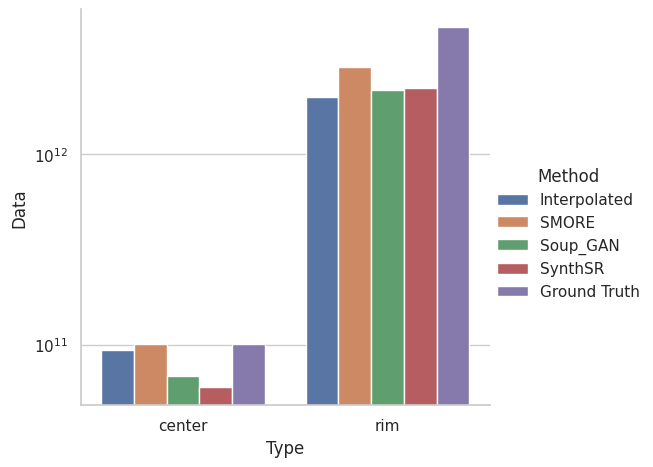

In [37]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.catplot(x='Type',y = 'Data',hue = 'Method',kind='bar', data=new_df)
plt.yscale('log')
#plt.yscale('log')
plt.savefig('images/coronal_center_power.png',dpi=300)


In [36]:
plt.savefig('images/coronal_center_power.png',dpi=300)

<Figure size 640x480 with 0 Axes>